# PRÁCTICA FINAL Módulo 7 Aprendizaje No Supervisado
# Sanchez Galindo Luis Alfredo
# Dariana Vielma Gallegos

Selecciona un conjunto de datos que hayas utilizado en alguna de las prácticas desarrolladas. Se eligío el siguiente dataset:

https://data.world/exercises/principal-components-exercise-1


## Iniciamos con la carga de nuestras dependencias y la base de datos.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from collections import Counter

In [13]:
%matplotlib inline
#a better plot shape for IPython
mpl.rcParams['figure.figsize']=[10,8]

In [16]:
sns.set()
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diplomado UNAM/Aprendizaje No Supervisado/Tarea Modulo Final/nndb_flat.csv')
df.head(5)

,id,foodgroup,shortdescrip,descrip,commonname,mfgname,scientificname,energy_kcal,protein_g,fat_g,carb_g,sugar_g,fiber_g,vita_mcg,vitb6_mg,vitb12_mcg,vitc_mg,vite_mg,folate_mcg,niacin_mg,riboflavin_mg,thiamin_mg,calcium_mg,copper_mcg,iron_mg,magnesium_mg,manganese_mg,phosphorus_mg,selenium_mcg,zinc_mg,vita_usrda,vitb6_usrda,vitb12_usrda,vitc_usrda,vite_usrda,folate_usrda,niacin_usrda,riboflavin_usrda,thiamin_usrda,calcium_usrda,copper_usrda,magnesium_usrda,phosphorus_usrda,selenium_usrda,zinc_usrda
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [9]:
df.shape

(8618, 45)

In [10]:
df.dtypes

id                    int64
foodgroup            object
shortdescrip         object
descrip              object
commonname           object
mfgname              object
scientificname       object
energy_kcal         float64
protein_g           float64
fat_g               float64
carb_g              float64
sugar_g             float64
fiber_g             float64
vita_mcg            float64
vitb6_mg            float64
vitb12_mcg          float64
vitc_mg             float64
vite_mg             float64
folate_mcg          float64
niacin_mg           float64
riboflavin_mg       float64
thiamin_mg          float64
calcium_mg          float64
copper_mcg          float64
iron_mg             float64
magnesium_mg        float64
manganese_mg        float64
phosphorus_mg       float64
selenium_mcg        float64
zinc_mg             float64
vita_usrda          float64
vitb6_usrda         float64
vitb12_usrda        float64
vitc_usrda          float64
vite_usrda          float64
folate_usrda        

Chemos valores nulos en la base

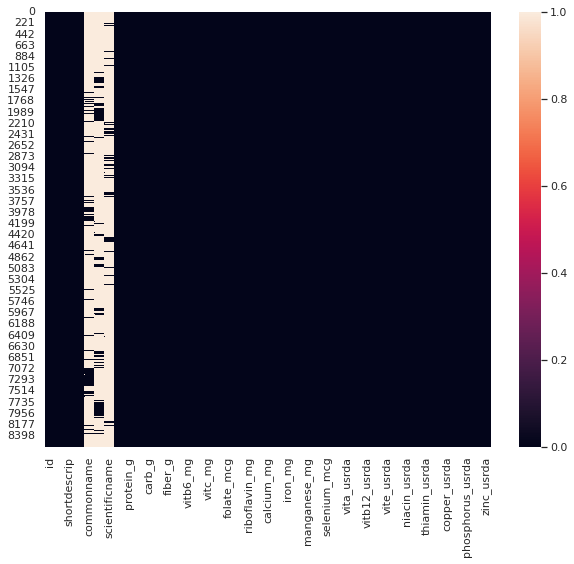

In [17]:
sns.heatmap(df.isnull())

In [20]:
df.columns

Index(['id', 'foodgroup', 'shortdescrip', 'descrip', 'commonname', 'mfgname',
       'scientificname', 'energy_kcal', 'protein_g', 'fat_g', 'carb_g',
       'sugar_g', 'fiber_g', 'vita_mcg', 'vitb6_mg', 'vitb12_mcg', 'vitc_mg',
       'vite_mg', 'folate_mcg', 'niacin_mg', 'riboflavin_mg', 'thiamin_mg',
       'calcium_mg', 'copper_mcg', 'iron_mg', 'magnesium_mg', 'manganese_mg',
       'phosphorus_mg', 'selenium_mcg', 'zinc_mg', 'vita_usrda', 'vitb6_usrda',
       'vitb12_usrda', 'vitc_usrda', 'vite_usrda', 'folate_usrda',
       'niacin_usrda', 'riboflavin_usrda', 'thiamin_usrda', 'calcium_usrda',
       'copper_usrda', 'magnesium_usrda', 'phosphorus_usrda', 'selenium_usrda',
       'zinc_usrda'],
      dtype='object')

Vamos a separar las columnas que no aportan la información nutrimental (es decir aquellas solo con campos numéricos)

In [31]:
df_filter =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Diplomado UNAM/Aprendizaje No Supervisado/Tarea Modulo Final/nndb_flat.csv", low_memory=False, 
                        usecols = [ "foodgroup", "energy_kcal", 'protein_g', 'fat_g', 'carb_g',
       'sugar_g', 'fiber_g', 'vita_mcg', 'vitb6_mg', 'vitb12_mcg', 'vitc_mg',
       'vite_mg', 'folate_mcg', 'niacin_mg', 'riboflavin_mg', 'thiamin_mg',
       'calcium_mg', 'copper_mcg', 'iron_mg', 'magnesium_mg', 'manganese_mg',
       'phosphorus_mg', 'selenium_mcg', 'zinc_mg', 'vita_usrda', 'vitb6_usrda',
       'vitb12_usrda', 'vitc_usrda', 'vite_usrda', 'folate_usrda',
       'niacin_usrda', 'riboflavin_usrda', 'thiamin_usrda', 'calcium_usrda',
       'copper_usrda', 'magnesium_usrda', 'phosphorus_usrda', 'selenium_usrda',
       'zinc_usrda'])

In [32]:
df_filter.shape

(8618, 39)

Podemos generar un resumen de variables

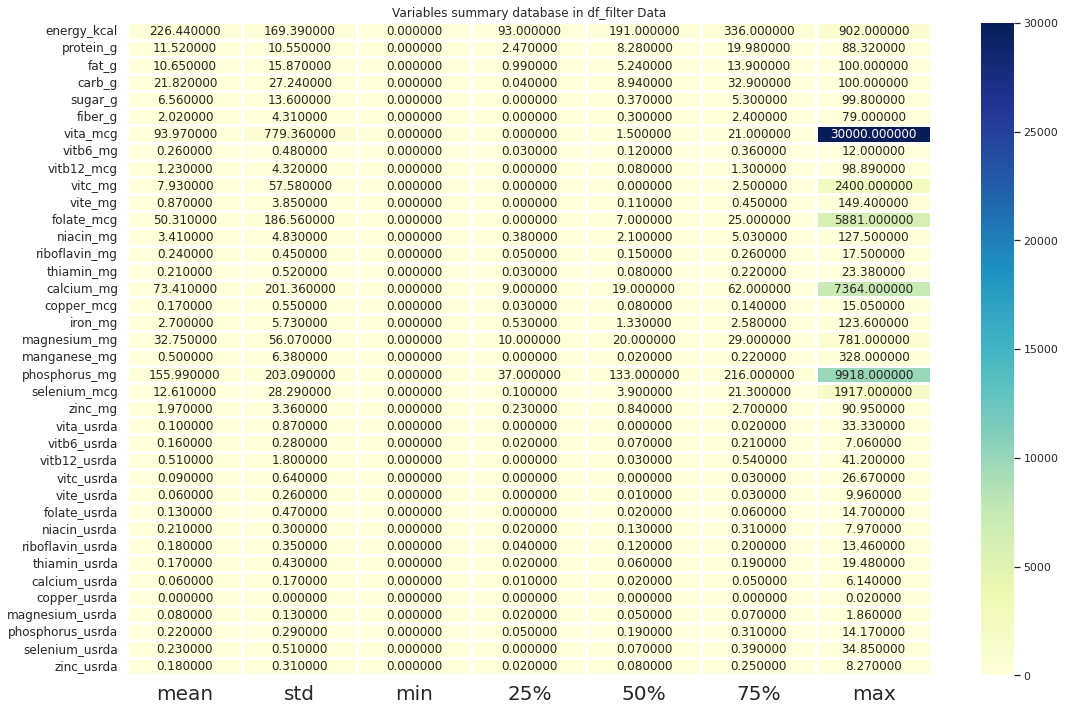

In [33]:
plt.figure(figsize=(18,12))
sns.heatmap(round(df_filter.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f",cmap="YlGnBu")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary database in df_filter Data")
plt.show()

Y una matriz de correlación en formato mapa de calor

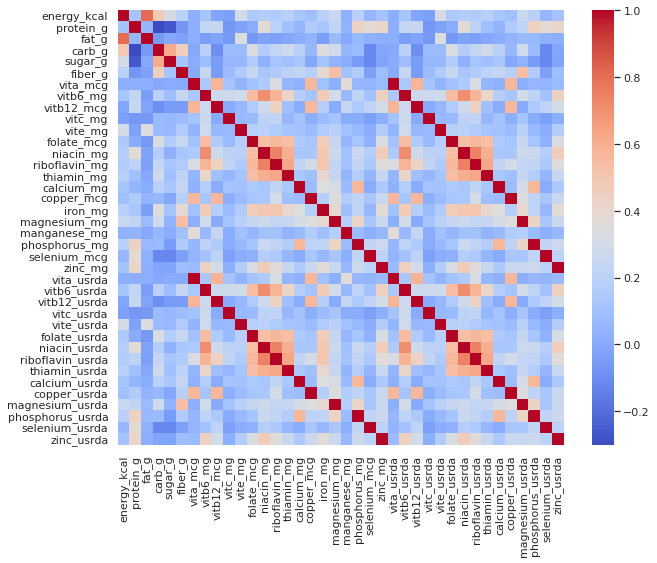

In [34]:
sns.heatmap(df_filter.corr(),cmap='coolwarm',annot=False)

Definimos nuestras variables dependientes y la variable target como el grupo de comida. 

In [133]:
X = df_filter.drop('foodgroup', axis = 1)  

y = df_filter[["foodgroup"]]

In [134]:
X.shape
y.shape

(8618, 1)

## Actividad 1: Aplicar Un algoritmo de agrupamiento de tu elección. Por ejemplo, un modelo de mezclas gaussianas o DBSCAN.



Aplicamos algoritmo DBSCAN de agrupamiento

In [37]:
dbs=DBSCAN(eps=300,min_samples=3).fit(X)
print(dbs)

DBSCAN(algorithm='auto', eps=300, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)


In [38]:
print(Counter(dbs.labels_))

Counter({0: 8454, -1: 121, 8: 9, 1: 6, 4: 6, 3: 4, 10: 3, 2: 3, 5: 3, 6: 3, 7: 3, 9: 3})


## Actividad 2: El análisis de componentes principales (PCA) para reducir su dimensión.

In [39]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)
x_std.shape

(8618, 38)

In [40]:
fit = PCA()
pca = fit.fit_transform(x_std)

Podemos ejecutar la explicación de las variables con mayor varianza.

In [42]:
print(fit.explained_variance_ratio_)
print(fit.explained_variance_ratio_[:5].sum())

[2.59701663e-01 1.08282045e-01 9.01901069e-02 7.71686623e-02
 6.26669880e-02 5.50885569e-02 4.58571468e-02 4.28351812e-02
 3.49009486e-02 3.47818607e-02 2.72411983e-02 2.38442218e-02
 2.30500724e-02 2.06378024e-02 1.71529594e-02 1.50411444e-02
 1.38055218e-02 1.14859027e-02 1.10080361e-02 9.96838044e-03
 8.42122159e-03 6.77049235e-03 9.98874240e-05 2.46325168e-33
 1.98460723e-33 1.79142354e-33 1.64273116e-33 1.55649065e-33
 1.38341666e-33 1.38341666e-33 1.38341666e-33 1.38341666e-33
 1.38341666e-33 1.38341666e-33 1.38341666e-33 1.38341666e-33
 1.38341666e-33 1.38341666e-33]
0.5980094646090437


Y graficar. 

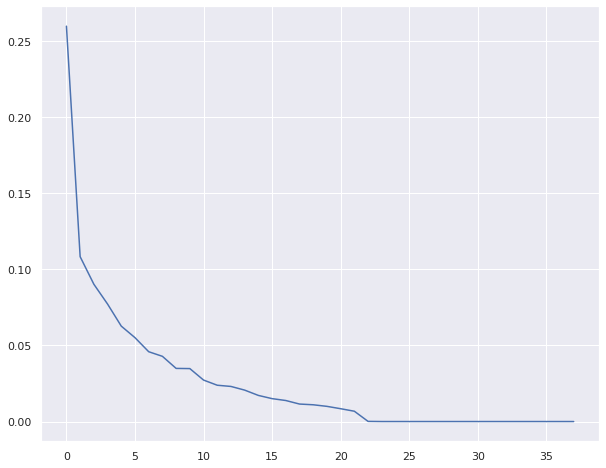

In [43]:
plt.plot(fit.explained_variance_ratio_)

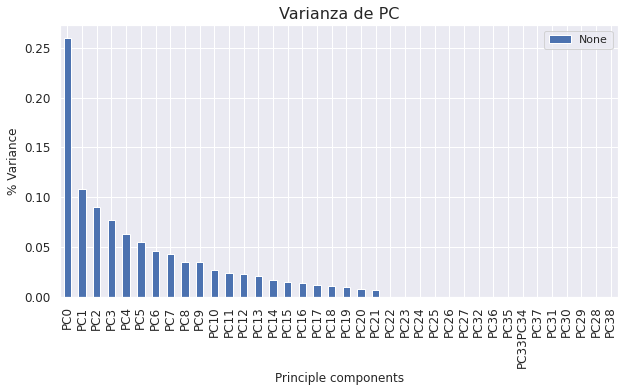

PC0         2.597017e-01
PC1         1.082820e-01
PC2         9.019011e-02
PC3         7.716866e-02
PC4         6.266699e-02
PC5         5.508856e-02
PC6         4.585715e-02
PC7         4.283518e-02
PC8         3.490095e-02
PC9         3.478186e-02
PC10        2.724120e-02
PC11        2.384422e-02
PC12        2.305007e-02
PC13        2.063780e-02
PC14        1.715296e-02
PC15        1.504114e-02
PC16        1.380552e-02
PC17        1.148590e-02
PC18        1.100804e-02
PC19        9.968380e-03
PC20        8.421222e-03
PC21        6.770492e-03
PC22        9.988742e-05
PC23        2.463252e-33
PC24        1.984607e-33
PC25        1.791424e-33
PC26        1.642731e-33
PC27        1.556491e-33
PC32        1.383417e-33
PC36        1.383417e-33
PC35        1.383417e-33
PC33PC34    1.383417e-33
PC37        1.383417e-33
PC31        1.383417e-33
PC30        1.383417e-33
PC29        1.383417e-33
PC28        1.383417e-33
PC38        1.383417e-33
dtype: float64


------------


In [47]:
one = pd.Series(fit.explained_variance_ratio_, index = ["PC0", 'PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 
                                                        'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20','PC21', 'PC22','PC23', 
                                                        'PC24','PC25', 'PC26','PC27', 'PC28','PC29', 'PC30','PC31', 'PC32','PC33'
                                                        'PC34','PC35', 'PC36','PC37', 'PC38'])
vec_1 = one.sort_values(ascending=False)

ax = vec_1.plot(kind='bar', title ="PC1", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Principle components", fontsize=12)
ax.set_ylabel("% Variance", fontsize=12)
ax.set_title("Varianza de PC", fontsize=16)
plt.show()
print(vec_1)
print()
print()
print('------------')

Intentamos con los primeros 2 componentes principales.

In [72]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_std)

In [73]:
df_pc = pd.DataFrame(data = principalComponents, columns = ["PC1", "PC2"])

In [74]:
df_pca = pd.concat([df_pc, y], axis = 1)

In [75]:
df_pca.shape

(8618, 3)

In [76]:
df_pca.head(3)

,PC1,PC2,foodgroup
0,-1.811468,0.244381,Dairy and Egg Products
1,-1.806892,0.251916,Dairy and Egg Products
2,-1.788169,0.230067,Dairy and Egg Products


[2.59701663e-01 1.08282045e-01 9.01901069e-02 7.71686623e-02
 6.26669880e-02 5.50885569e-02 4.58571468e-02 4.28351812e-02
 3.49009486e-02 3.47818607e-02 2.72411983e-02 2.38442218e-02
 2.30500724e-02 2.06378024e-02 1.71529594e-02 1.50411444e-02
 1.38055218e-02 1.14859027e-02 1.10080361e-02 9.96838044e-03
 8.42122159e-03 6.77049235e-03 9.98874240e-05 2.46325168e-33
 1.98460723e-33 1.79142354e-33 1.64273116e-33 1.55649065e-33
 1.38341666e-33 1.38341666e-33 1.38341666e-33 1.38341666e-33
 1.38341666e-33 1.38341666e-33 1.38341666e-33 1.38341666e-33
 1.38341666e-33 1.38341666e-33]



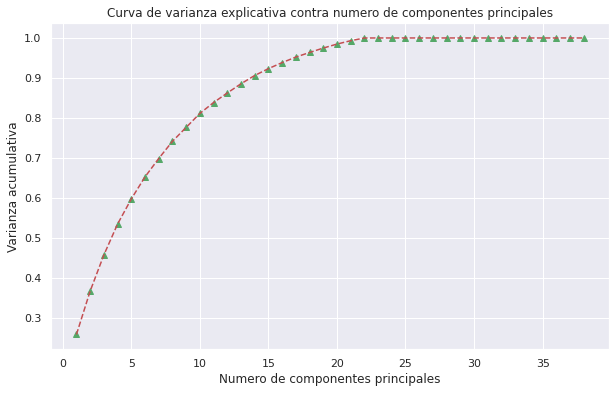

In [79]:
sklearn_pca = PCA(n_components = None) 
sklearn_transf = sklearn_pca.fit_transform(x_std)
varianza_expl = sklearn_pca.explained_variance_ratio_
print(varianza_expl)
print()
cum_var_exp = np.cumsum(varianza_expl)
plt.figure(figsize = (10, 6))
plt.xlabel('Numero de componentes principales')
plt.ylabel('Varianza acumulativa')
plt.title('Curva de varianza explicativa contra numero de componentes principales')
nc = np.arange(1, varianza_expl.shape[0] + 1)
plt.plot(nc, cum_var_exp, 'g^')
plt.plot(nc, cum_var_exp, '--r')
plt.show()

Graficamos 2D. Para ver la explicabilidad del modelo.

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


[-1.81146802 -1.80689184 -1.78816851 ... -1.69631061  0.69967735
 -0.95280858]


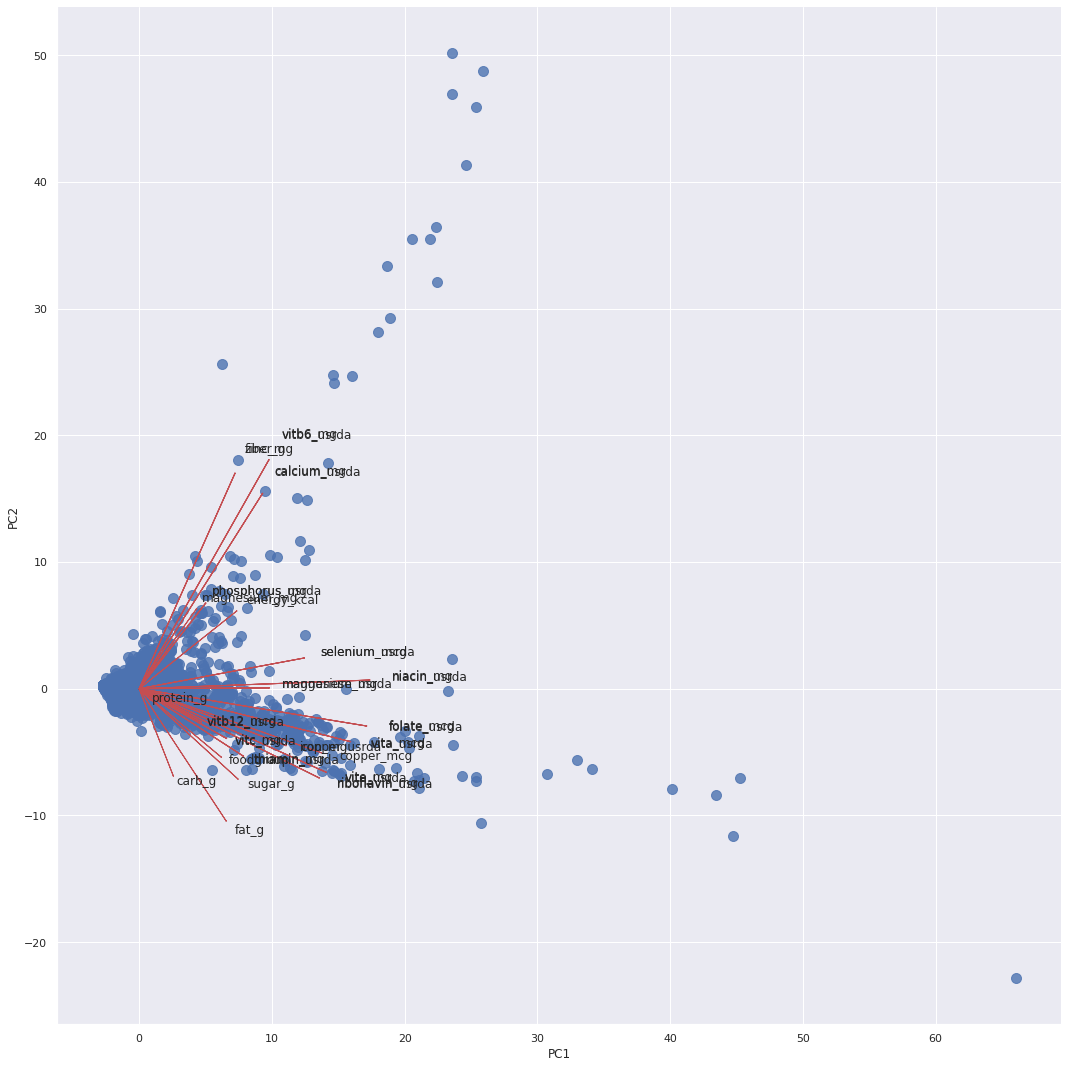

In [86]:
sns.lmplot('PC1', 'PC2', data=df_pca, fit_reg = False, size = 15, scatter_kws={"s": 100})

xvector = pca.components_[0]
yvector = pca.components_[1]

xs = pca.transform(x_std)[:,0]
ys = pca.transform(x_std)[:,1]

print(xs)

for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.005, head_width=0.05)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
             list(df_filter.columns.values)[i])

## Actividad 3. Un algoritmo para descubrir novedades y valores atípicos de tu elección

Podemos probar con un grafico de Boxplot sobre las instancias. 

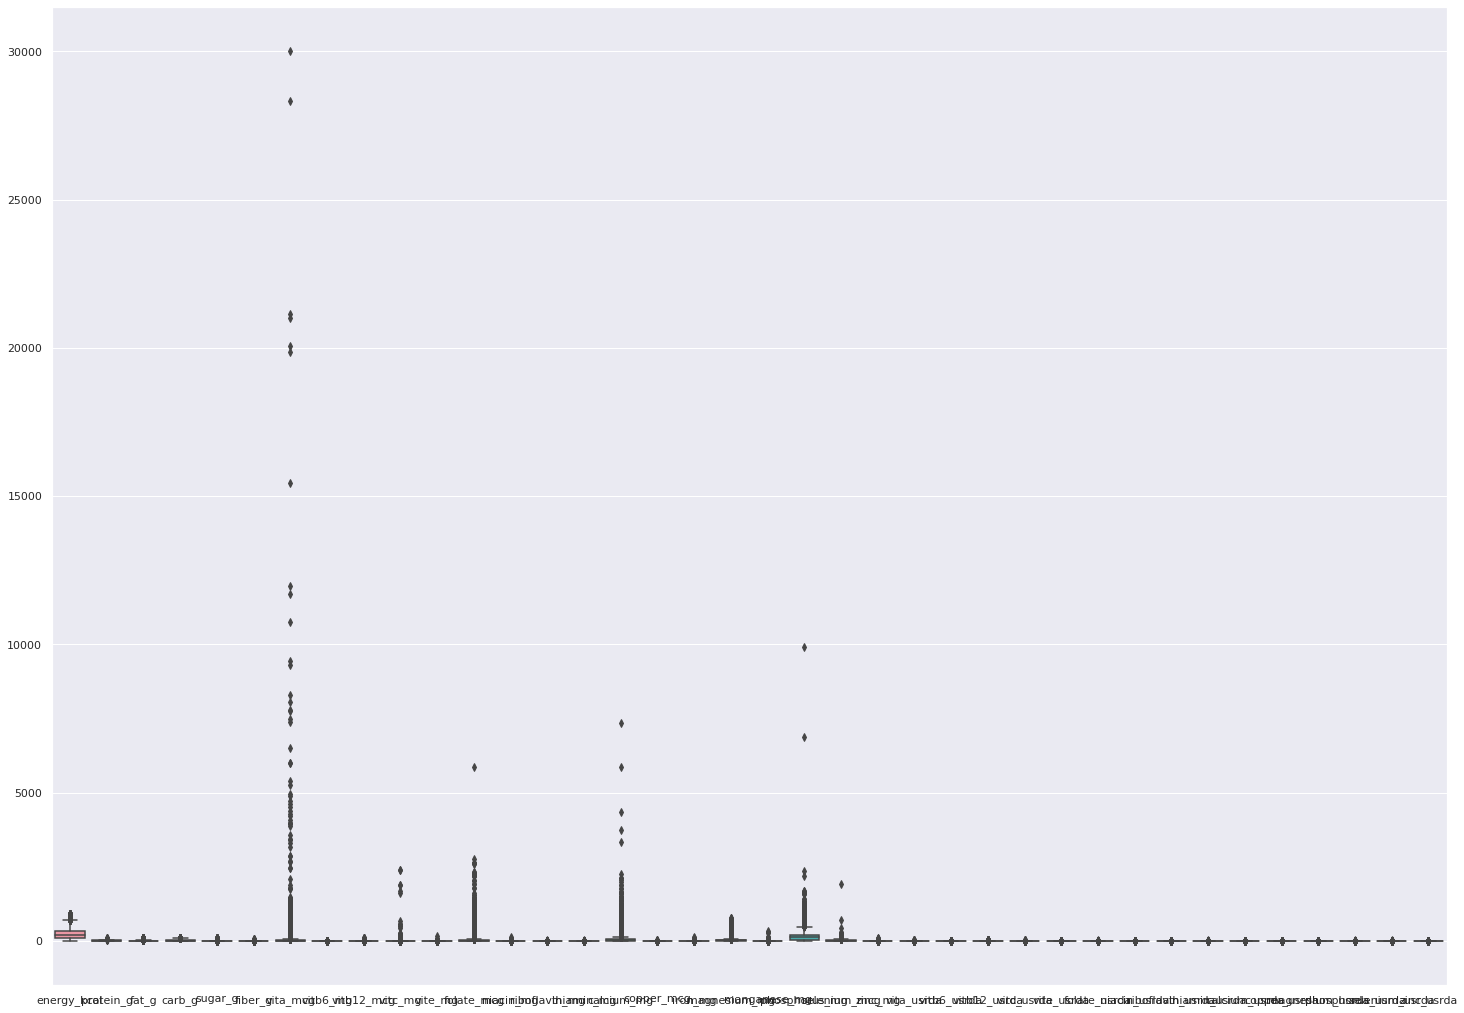

In [91]:
plt.figure(figsize=(25,18))

sns.boxplot(data = df_filter)

O ben podemos definir una función con umbrales segun la estandarización en los datos de PCA.

In [93]:
def anomalias(data): 
 anomalias=[] 
 data_std=np.std(data) 
 data_mean=np.mean(data) 
 anomaly_threshold = data_std *4 
  
 limit_left=data_mean - anomaly_threshold 
 limit_right=data_mean + anomaly_threshold 
  
 for datum in data: 
  if datum <limit_left or datum>limit_right: 
        anomalias.append(datum) 
 return anomalias 

Para el componente Principal 1

In [96]:
len(anomalias(df_pca["PC1"].to_list()))

86

In [97]:
print(anomalias(df_pca["PC1"].to_list()))

[15.883878510373995, 14.251708044593663, 15.196506018689405, 12.657856902832323, 13.562502642326548, 14.094127182347231, 14.810765330305202, 13.079794548620766, 14.608189175401277, 14.664100133473308, 30.731190321637932, 20.31705550619492, 15.088959080816965, 15.237007952079015, 14.669932902927897, 12.774372477806876, 14.613589668740287, 43.45824492955596, 14.132242610095307, 13.63273738216356, 15.088716753022172, 14.031121977901613, 15.284668921058143, 40.15657823957338, 14.543060130390408, 19.683433348800712, 13.348224801563976, 44.746085491255705, 20.26269723257726, 21.056290499297017, 13.883603513056265, 13.803044683494802, 24.332888259558047, 13.164506190174658, 14.093850775825665, 23.66834063565739, 13.032355816444715, 12.66928748109184, 14.530084962470607, 12.8780367083993, 45.22561893805306, 19.330421811317606, 15.18427256967188, 12.643570235708413, 16.219472636155693, 15.84482799474998, 14.64415323256837, 12.576093893244952, 13.70358074940548, 13.498305700354061, 14.2260121839

Para el componente Principal 2

In [98]:
len(anomalias(df_pca["PC2"].to_list()))

40

In [99]:
print(anomalias(df_pca["PC2"].to_list()))

[25.63269142011164, 24.765503755392086, 24.09838790875097, 10.525741275727146, 15.048343241746288, 8.927945509875261, 10.049951364576458, -8.369433672508983, -11.606579952551662, 10.412988457650718, 8.733418988886207, 17.80239170208534, 24.686658848235627, 35.48711125137925, 36.39242272107289, 18.05908150781367, 10.16219159100738, 11.634797200724156, 10.923740177882669, 10.085350369062512, 8.991352373056543, 10.264828231568142, 15.616907076852426, 29.273377443227353, 28.157159095277727, 32.079905659589635, 33.32897054702668, 48.74157094267682, 45.92087405396748, 10.47284441709903, 9.576104778957196, 41.34469210810412, 35.49081764205572, -10.569060112417935, 46.91992807500143, 50.163409977730716, 14.862374926055102, 10.4452557865874, 9.015189318594171, -22.83102625870101]


## Actividad 4. El método KernelPCA. 

In [101]:
from sklearn.decomposition import PCA,KernelPCA
kpca = KernelPCA(kernel='sigmoid',n_components=2)
principalComponents_2 = kpca.fit_transform(x_std)

In [103]:
df_pca_2 = pd.DataFrame(data = principalComponents_2, columns = ["PCA1" , "PCA2"])

In [104]:
df_pca_2.head(3)

,PCA1,PCA2
0,-0.215917,-0.093035
1,-0.215285,-0.094444
2,-0.210812,-0.128806


In [105]:
df_kpca = pd.concat([df_pca_2, y], axis = 1)

In [106]:
df_kpca.head(3)

,PCA1,PCA2,foodgroup
0,-0.215917,-0.093035,Dairy and Egg Products
1,-0.215285,-0.094444,Dairy and Egg Products
2,-0.210812,-0.128806,Dairy and Egg Products


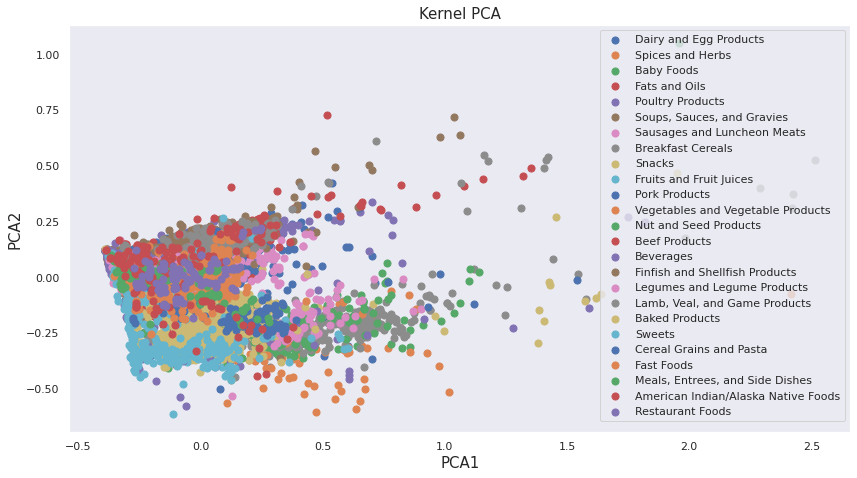

In [111]:
fig = plt.figure(figsize = (14,7.5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PCA1', fontsize = 15)
ax.set_ylabel('PCA2', fontsize = 15)
ax.set_title('Kernel PCA', fontsize = 15)

targets=y.foodgroup.drop_duplicates()

for target in targets:
    indicesToKeep = df_kpca['foodgroup'] == target
    ax.scatter(df_kpca.loc[indicesToKeep, 'PCA1']
              , df_kpca.loc[indicesToKeep, 'PCA2']
              , s = 50)
    
ax.legend(targets)
ax.grid()

## Una técnica de Manifold Learning para reducir su dimensionalidad

In [117]:
from sklearn.manifold import TSNE
from sklearn import manifold

In [124]:
iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(X)
manifold_iso_data = iso.transform(X)

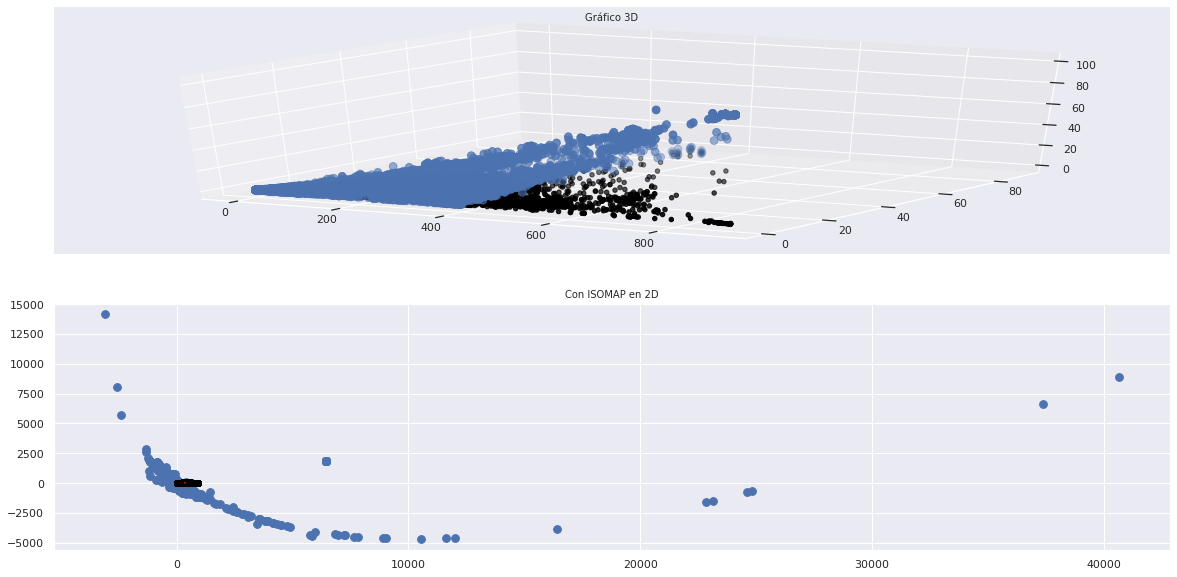

In [128]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Gráfico 3D', fontsize=10)
ax.scatter(X[:,0],X[:,1],X[:,2],cmap="Accent",s=60)
x = X[:,0][2:10000] 
y = X[:,1][2:10000] 
ax.scatter(x,y,c = "black") 
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 

ax.set_title('Con ISOMAP en 2D', fontsize=10)
ax.scatter(manifold_iso_data[:,0],manifold_iso_data[:,1],cmap="Accent",s=60)
x = X[:,0][2:10000]
y = X[:,1][2:10000]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

Para reducir la dimensionalidad utilizamos ISOMAP

In [127]:
from sklearn.manifold import Isomap
ismp = Isomap(n_components=2)
principalComponents_3 = ismp.fit_transform(x_std)

In [129]:
df_pca_3 = pd.DataFrame(data = principalComponents_3, columns = ["PCA1" , "PCA2"])

In [131]:
df_pca_3.head(3)

,PCA1,PCA2
0,6.166095,2.694616
1,6.166030,2.694304
2,7.232383,-2.453931


In [135]:
df_mpca = pd.concat([df_pca_3, y], axis = 1)

In [136]:
df_mpca.head(3)

,PCA1,PCA2,foodgroup
0,6.166095,2.694616,Dairy and Egg Products
1,6.166030,2.694304,Dairy and Egg Products
2,7.232383,-2.453931,Dairy and Egg Products


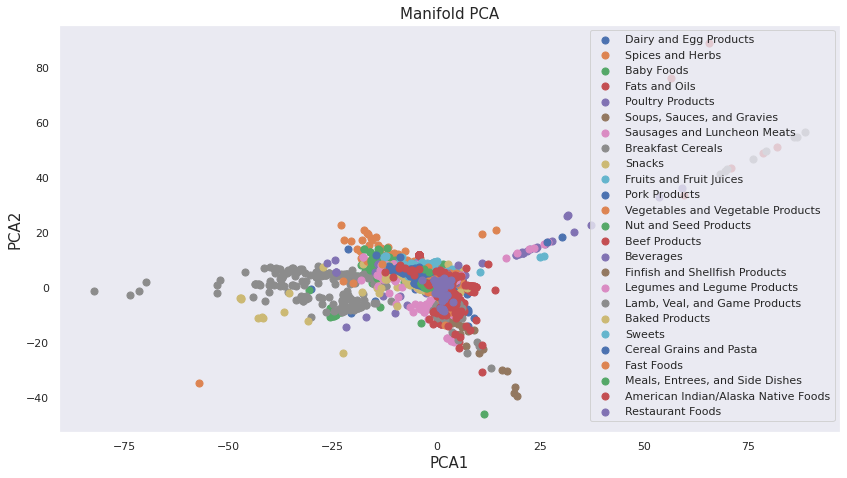

In [137]:
fig = plt.figure(figsize = (14,7.5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PCA1', fontsize = 15)
ax.set_ylabel('PCA2', fontsize = 15)
ax.set_title('Manifold PCA', fontsize = 15)

targets=y.foodgroup.drop_duplicates()

for target in targets:
    indicesToKeep = df_mpca['foodgroup'] == target
    ax.scatter(df_mpca.loc[indicesToKeep, 'PCA1']
              , df_mpca.loc[indicesToKeep, 'PCA2']
              , s = 50)
    
ax.legend(targets)
ax.grid()

#### Conclusion:

Se utilizo el data set de la siguiente url:https://data.world/exercises/principal-components-exercise-1
El cual contiene informacion nutrimental de diferentes alimentos, las columnas de el presente set de datos fueron cradas utilizando
como referencia : The Essential Guide to Nutrient Requirements.
    
Durante el analisis de los datos se descubrio un importante porcentaje de perdida en los datos de algunas columnas, al ser estas columnas
de tipo cualitativas se dedujo que no afectarian a los modelados posteriormente realizados, ya que se tomaron en cuenta solo aquellas columnas
que aportan datos relevantes para este analisis, es decir se separaron las colummas con datos cuantiativos (mg) y con ellas se 
realizaron los modelos posteriores.

En muchos problemas de Data Sciece, los datos pueden estar sobre cargados con diferentes y N cantidad de features, esto puede afectar el sobrecargado y el entrenamiento de los modelos. Por esta razon es de gran importancia el conocimiento y manejo de aloritmos que nos ayuden en la reduccion de dimensiones. En este ejercicio se aplicaron algunos de estos algoritmos como lo son: PCA, KernelIPCA y tecnicas de Manifold learning, con los cuales se obtuvieron buenos resultados.

Para la deteccion de outilers se utilizo el grafico boxplot, el cual muestra la existencia de outliers de una manera sencilla, rapida
y visual. lo cual permite identificar rapidamente aquellos paramentros con datos atipicos. Al trabajar con varianzas, el metodo PCA es muy sensible
a la presencia de datos atipicos, por esta razon se recomienda poner especial atencion en esta parte del analisis.

